# Histograms, Binnings and Density

In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

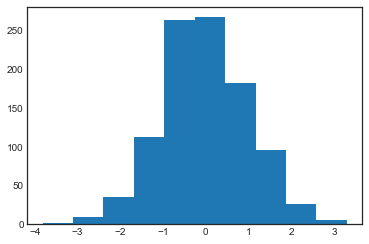

In [59]:
plt.hist(data);

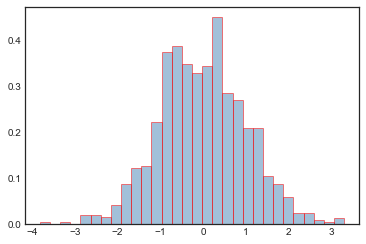

In [60]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='bar', color='steelblue',
         edgecolor='red');

When comparing multiple histograms, the following is probably best (ie transparent and histtype='stepfilled'

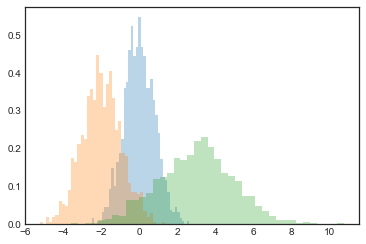

In [61]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If we want to count the number of points within the bins and not display it, we can use np.histogram()

In [62]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)
print(bin_edges)

[ 12 147 531 278  32]
[-3.82228022 -2.39699429 -0.97170835  0.45357759  1.87886353  3.30414947]


## Two dimensional Histograms and Binnings

We can divide points between two dimensional bins. 

In [63]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### plt.hist2d: Two-dimensional histogram

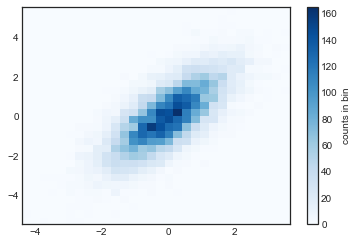

In [64]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin');

More details can be found in the docstring. Also there is a numpy equivalent:

In [65]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

## plt.hexbin: Hexagonal binnings

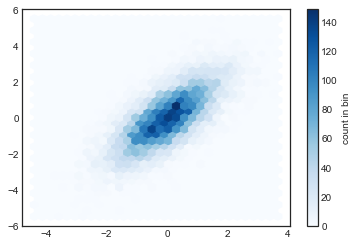

In [66]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

## Kernel density estimation

Another method to evaluate densities in multiple dimensions is kernel density estimation (KDE). This will be discussed later, but can be thought of as a way to "smear out" points in space and add up the result to obtain a smooth function. 

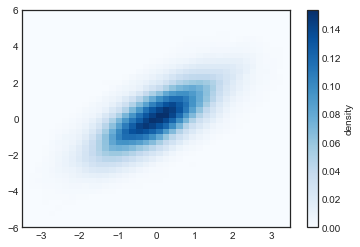

In [69]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid

xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# plot result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6], 
           cmap='Blues')
cb = plt.colorbar()
cb.set_label('density')